<a href="https://colab.research.google.com/github/lovecrushfamily/2021-CS109A/blob/master/content/lectures/lecture06/notebook/s4-ex3-challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Title :
Exercise: Hyper-parameter Tuning for Ridge Regression
    
## Description :
The goal of this exercise is to perform hyper-parameter tuning and produce a plot similar to the one below:
    
<img src="https://github.com/Harvard-IACS/2021-CS109A/blob/master/content/lectures/lecture06/fig/fig4.png?raw=1" style="width: 500px;">

## Data Description:
- The dataset has a total of 3 columns with names - x,y and f
- "$x$" represents the predictor variable
- "$y$" is the response variable
- "$f$" denotes the true values of the underlying function

## Instructions:
- Read the dataset `polynomial50.csv` as a dataframe.
- Assign the predictor and response variables.
- Visualize the dataset by making plots using the predictor and response variables along with the true function.
- Split the data into train and validation sets using `random_state=42`.
- For each value of alpha from a given list:
    - Estimate a Ridge regression on the training data with the alpha value.
    - Calculate the MSE of training and validation data. Append to separate lists appropriately.
    - Use the given **plot_functions** function to plot the value of parameters.
- Compute the best hyperparameter for this data based on the lowest MSE
- Make a plot of the MSE values for each value of hyper-parameter alpha from the list above. It should look similar to the one given above.

## Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html" target="_blank">sklearn.Ridge()</a>
Linear least squares with L2 regularization.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" target="_blank">sklearn.train_test_split()</a>
Splits the data into random train and test subsets.

<a href="https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html" target="_blank">ax.plot()</a>
Plot y versus x as lines and/or markers.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html" target="_blank">sklearn.PolynomialFeatures()</a>
Generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html" target="_blank">sklearn.fit_transform()</a>
Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html" target="_blank">sklearn.Ridge()</a>
Linear least squares with L2 regularization.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict" target="_blank">sklearn.predict()</a>
Predict using the linear model.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html" target="_blank">mean_squared_error()</a>
Mean squared error regression loss.

**Note:** This exercise is auto-graded and you can try multiple attempts.

In [3]:
# Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
# plt.style.use('seaborn-white')

# These are custom functions made to help you visualise your results
import numpy
from sklearn.preprocessing import PolynomialFeatures


# This a helper function that will help you plot the estimated polynomial regression along with the true values & true function
# We will use this later

def plot_functions(d, est, ax, df, alpha, xvalid, yvalid, xtrain, ytrain):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', label="training", ms=5, alpha=0.7, color='darkblue')
    ax.plot(xvalid, yvalid, 's', label="validation", ms=5, alpha=0.8, color='#007D66')
    transx = numpy.arange(0, 1.1, 0.01)
    transX = PolynomialFeatures(d).fit_transform(transx.reshape(-1, 1))
    ax.plot(transx, est.predict(transX), linewidth=3, alpha=0.8, label="alpha = %s" % str(alpha), color='#FF2F92')

    # This is just aesthetics
    ax.set_ylim((1, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')


# This helper function will help you plot the magnitude of the coefficients of the polynomial regression
# The values will help you determine which powers of the feature are most influential

def plot_coefficients(est, ax, alpha):
    coef = est.coef_.ravel()
    ax.bar(range(len(coef)), numpy.abs(coef), label=f'alpha = {alpha}', color='#9FC131FF', alpha=0.5, edgecolor='k')
    ax.set_yscale('log')
    ax.set_ylim((1e-1, 1e15))
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.legend(loc='upper left')


In [4]:
# Open the file 'polynomial50.csv' as a Pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lovecrushfamily/2021-CS109A/refs/heads/master/content/lectures/lecture06/data/polynomial50.csv')
df


,x,f,y
0,0.000000,1.000000,0.923951
1,0.020408,1.039176,1.028283
2,0.040816,1.075173,1.069739
3,0.061224,1.108144,1.077327
4,0.081633,1.138242,1.105688
5,0.102041,1.165620,1.153683
6,0.122449,1.190431,1.162692
7,0.142857,1.212828,1.283463
8,0.163265,1.232964,1.134759
9,0.183673,1.250992,1.314476


In [5]:
# Take a quick look at the data
df.head()


,x,f,y
0,0.000000,1.000000,0.923951
1,0.020408,1.039176,1.028283
2,0.040816,1.075173,1.069739
3,0.061224,1.108144,1.077327
4,0.081633,1.138242,1.105688


In [6]:
# Assign the values of the 'x' column as the predictor
x = df[['x']].values

# Assign the values of the 'y' column as the response
y = df['y'].values

# Also assign the true value of the function (column 'f') to the variable f
f = df['f'].values


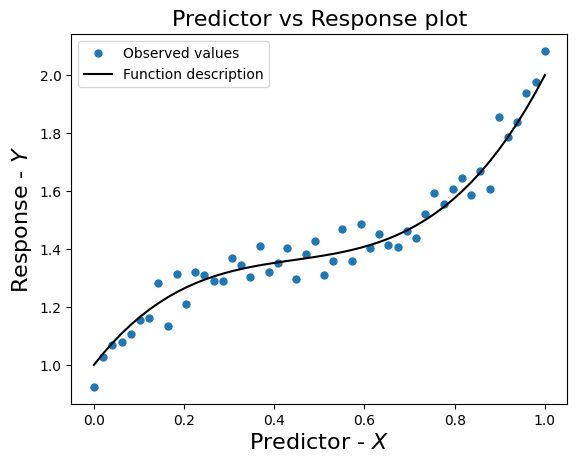

In [7]:
# Visualise the distribution of the x, y values & also the value of the true function f
fig, ax = plt.subplots()

# Plot x vs y values
ax.plot(x, y, '.', label = 'Observed values',markersize=10)

# Plot x vs true function value
ax.plot(x, f, 'k-', label = 'Function description')

# Helper code to annotate the plot
ax.legend(loc = 'best')
ax.set_xlabel('Predictor - $X$',fontsize=16)
ax.set_ylabel('Response - $Y$',fontsize=16)
ax.set_title('Predictor vs Response plot',fontsize=16)
plt.show();


In [8]:
# Split the data into train and validation sets with
# training size 80% and random_state = 42
x_train, x_val, y_train, y_val = train_test_split(x,y, train_size = 0.8,random_state=42)


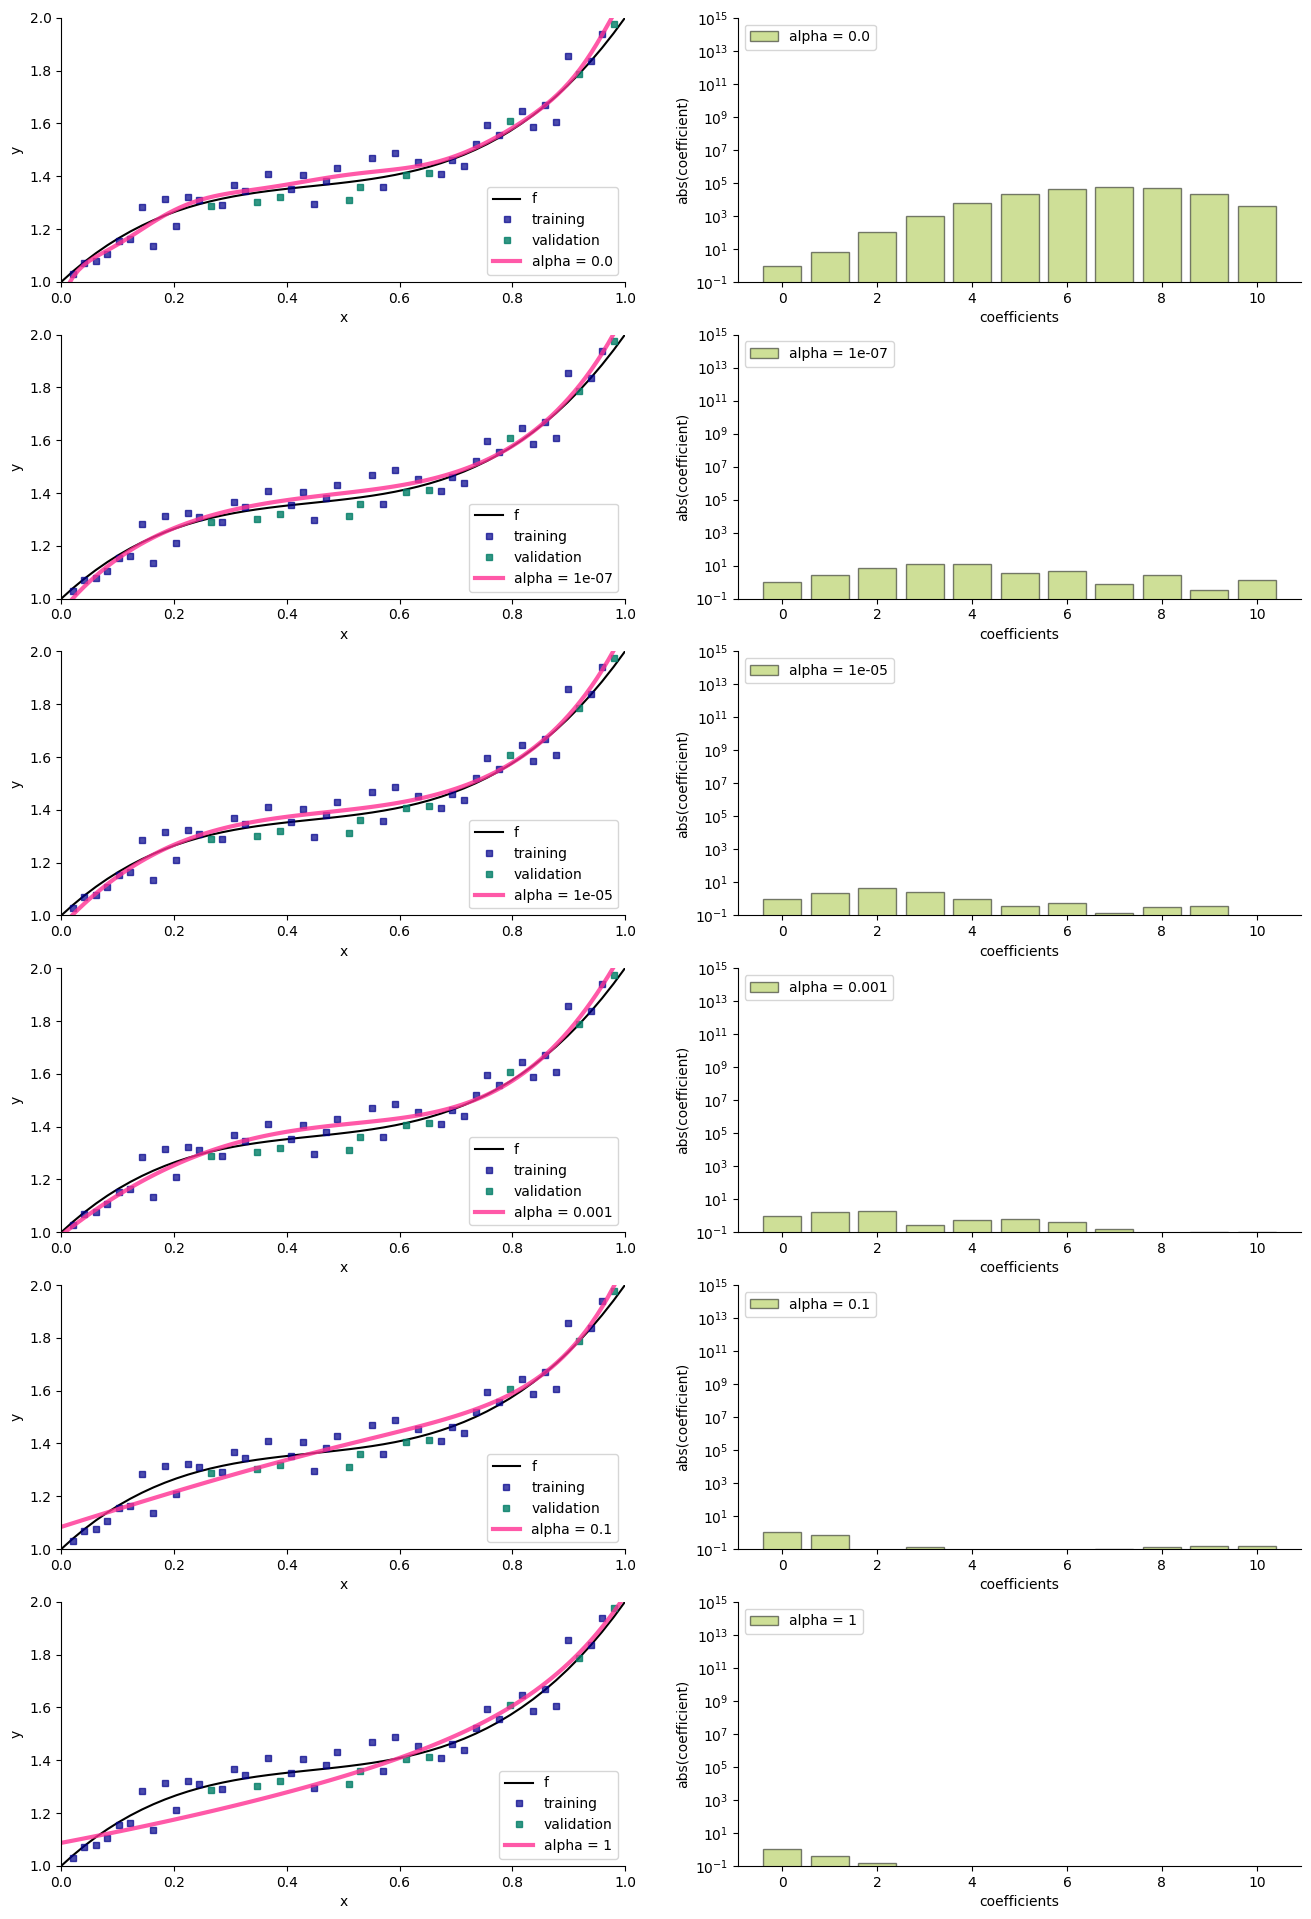

In [10]:
### edTest(test_mse) ###

fig, rows = plt.subplots(6, 2, figsize=(16, 24))

# Select the degree for polynomial features
degree= 10

# List of hyper-parameter values
alphas = [0.0, 1e-7,1e-5, 1e-3, 0.1,1]

# Create two lists for training and validation error
training_error, validation_error = [],[]

# Compute the polynomial features train and validation sets
x_poly_train = PolynomialFeatures(degree=degree).fit_transform(x_train)
x_poly_val= PolynomialFeatures(degree=degree).fit_transform(x_val)

# Loop over all the alpha values
for i, alpha in enumerate(alphas):

    # Code to get the plot grid
    l, r = rows[i]

    # Initialize a Ridge regression with the current alpha
    ridge = Ridge(fit_intercept=False, alpha=alpha)

    # Fit the model on the transformed training data
    ridge.fit(x_poly_train, y_train)

    # Predict on the transformed training set
    y_train_pred = ridge.predict(x_poly_train)

    # Predict on the transformed validation set
    y_val_pred = ridge.predict(x_poly_val)

    # Compute the training and validation errors
    mse_train = mean_squared_error(y_train_pred, y_train)
    mse_val = mean_squared_error( y_val_pred, y_val)

    # Add the error values to the appropriate list
    training_error.append(mse_train)
    validation_error.append(mse_val)

    # Calling the helper functions plot_functions &
    # plot_coefficients to visualise the plots
    plot_functions(degree, ridge, l, df, alpha, x_val, y_val, x_train, y_train)
    plot_coefficients(ridge, r, alpha)

sns.despine();


In [11]:
### edTest(test_hyper) ###
# Find the best value of hyper parameter, which
# gives the least error on the validdata
best_parameter = alpha = 0.001

# Print the best hyper parameter
print(f'The best hyper parameter value, alpha = {best_parameter}')


The best hyper parameter value, alpha = 0.001


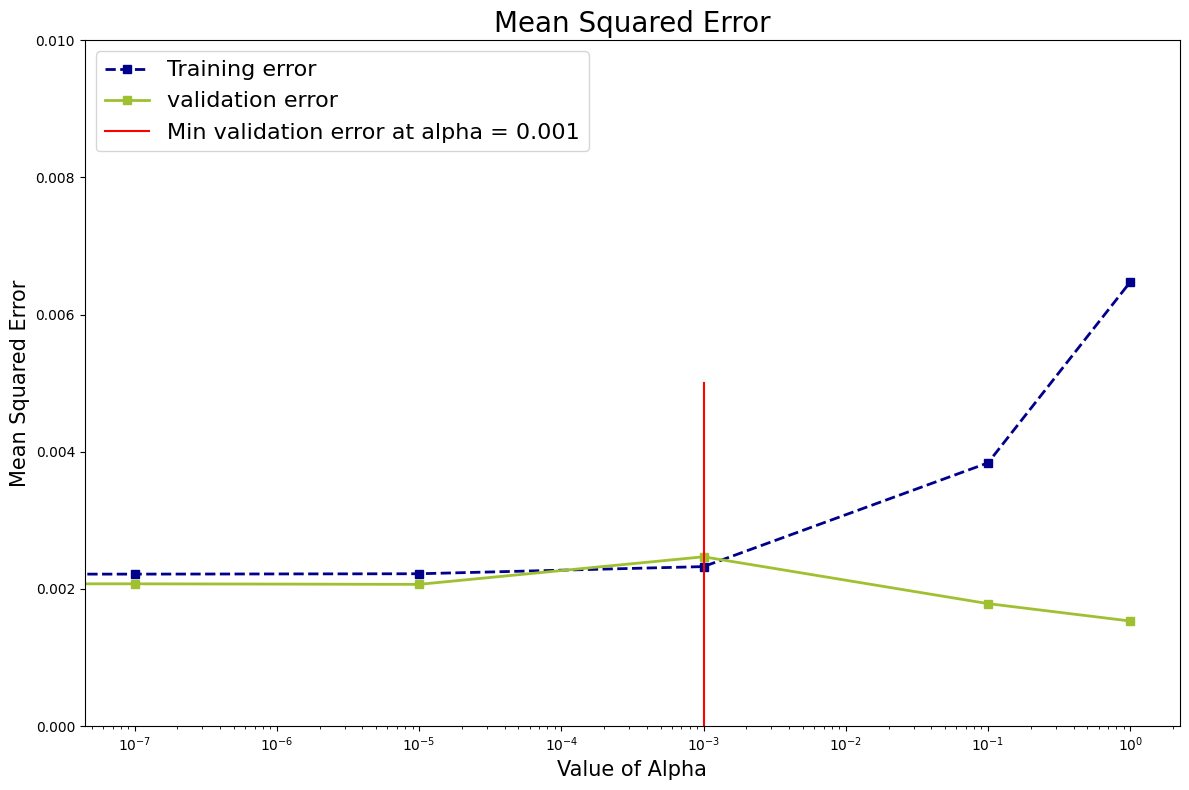

In [12]:
# Plot the errors as a function of increasing d value
# to visualise the training and validation errors
fig, ax = plt.subplots(figsize = (12,8))

# Plot the training errors for each alpha value
ax.plot(alphas,training_error,'s--', label = 'Training error',color = 'Darkblue',linewidth=2)

# Plot the validation errors for each alpha value
ax.plot(alphas,validation_error,'s-', label = 'validation error',color ='#9FC131FF',linewidth=2 )

# Draw a vertical line at the best parameter
ax.axvline(best_parameter, 0, 0.5, color = 'r', label = f'Min validation error at alpha = {best_parameter}')

ax.set_xlabel('Value of Alpha',fontsize=15)
ax.set_ylabel('Mean Squared Error',fontsize=15)
ax.set_ylim([0,0.010])
ax.legend(loc = 'upper left',fontsize=16)
ax.set_title('Mean Squared Error',fontsize=20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();
